In [42]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import pandas
import glob
import netCDF4
import matplotlib.dates
import matplotlib.gridspec

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

In [ ]:
run_info = 'FMAASO'
skip_time=0

In [ ]:
geo_em_ncfile = xarray.open_dataset('/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'].data[0,:,:]

# import FMAASO 400 data

In [ ]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [ ]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [ ]:
ptot_400 = numpy.load('DATA_ptot_400.npy')

wa_400 = numpy.load('DATA_wa_400.npy')

ua_400 = numpy.load('DATA_ua_400.npy')

geopot_400 = numpy.load('DATA_geopot_400.npy')

In [ ]:
rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']
qvapor_400 = cont_mfds['QVAPOR']

In [ ]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

# import FMAASO 1000 data

In [ ]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [ ]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [ ]:
ptot_400 = numpy.load('DATA_ptot_400.npy')

wa_1000 = numpy.load('DATA_wa_1000.npy')

ua_1000 = numpy.load('DATA_ua_1000.npy')

geopot_1000 = numpy.load('DATA_geopot_1000.npy')

In [ ]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']
qvapor_1000 = phys_mfds['QVAPOR']

# get time stamps

In [ ]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

In [ ]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

# qvapor diffs

In [ ]:
qvapor_diffs = qvapor_1000 - qvapor_400

In [ ]:
qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]
qvapor_400_lat_subset = qvapor_400[:,:,lat_indices[:,0],:]

In [ ]:
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)
qvapor_400_lat_mean = numpy.nanmean(qvapor_400_lat_subset, axis=2)

# ptot diffs

In [ ]:
ptot_400_lat_subset = ptot_400[:,:,lat_indices[:,0],:]
ptot_400_lat_mean = numpy.nanmean(ptot_400_lat_subset, axis=2)
ptot_400_lat_time_mean = numpy.nanmean(ptot_400_lat_mean, axis=0)

# raintot diffs

In [ ]:
raintot_400 = rainc_400+rainnc_400
raintot_1000 = rainc_1000+rainnc_1000

raintot_diffs = raintot_1000-raintot_400

raintot_diffs_lat_subset = raintot_diffs[:,lat_indices[:,0],:]
raintot_400_lat_subset = raintot_400[:,lat_indices[:,0],:]

In [ ]:
raintot_diffs_lat_subset.shape

In [ ]:
raintot_hourly_diffs_lat_subset = numpy.zeros((raintot_diffs_lat_subset.shape))*numpy.nan
raintot_hourly_diffs_lat_subset[1:,:,:] = numpy.diff(raintot_diffs_lat_subset, axis=0)
raintot_hourly_diffs_lat_mean = numpy.nanmean(raintot_hourly_diffs_lat_subset, axis=1)

# geopot 400

In [ ]:
geopot_400_lat_subset = geopot_400[:,:,lat_indices[:,0],:]

In [ ]:
geopot_400_lat_subset.shape

In [ ]:
geopot_400_lat_mean = numpy.nanmean(geopot_400_lat_subset, axis=2)

In [ ]:
geopot_400_lat_time_mean = numpy.nanmean(geopot_400_lat_mean, axis=0)

# open mse from npy files

# ua differences

In [ ]:
ua_diffs = ua_1000-ua_400

In [ ]:
ua_diffs_lat_subset = ua_diffs[:,:,lat_indices[:,0],:]
ua_400_lat_subset = ua_400[:,:,lat_indices[:,0],:]

In [ ]:
ua_diffs_lat_mean = numpy.nanmean(ua_diffs_lat_subset, axis=2)
ua_400_lat_mean = numpy.nanmean(ua_400_lat_subset, axis=2)

# wa differences

In [ ]:
wa_diffs = wa_1000-wa_400

In [ ]:
wa_diffs_lat_subset = wa_diffs[:,:,lat_indices[:,0],:]
wa_400_lat_subset = wa_400[:,:,lat_indices[:,0],:]

In [ ]:
wa_diffs_lat_mean = numpy.nanmean(wa_diffs_lat_subset, axis=2)
wa_400_lat_mean = numpy.nanmean(wa_400_lat_subset, axis=2)

# PBLH differences

# Hövmoller

# pick out based on geopotential height (1-3km)

# pick out qvapor based on pressure

In [ ]:
qvapor_diffs_lat_mean_850_700hPa = numpy.copy(qvapor_diffs_lat_mean)
qvapor_diffs_lat_mean_850_700hPa[(ptot_400_lat_mean>90000.)|(ptot_400_lat_mean<70000.)] = numpy.nan
qvapor_diffs_lat_mean_850_700hPa = numpy.nanmean(qvapor_diffs_lat_mean_850_700hPa, axis=1)

# pick out wa based on pressure

In [ ]:
wa_diffs_lat_mean_700_200hPa = numpy.copy(wa_diffs_lat_mean)
#wa_diffs_lat_mean_700_200hPa[(ptot_400_lat_mean>50000.)] = numpy.nan
wa_diffs_lat_mean_700_200hPa = numpy.nanmean(wa_diffs_lat_mean_700_200hPa, axis=1)

# calculate mean wind in the layers

In [ ]:
lon_left = 285.
lon_right = 315.
xlong_indices_ua_calc = (xlong[0,:]+360. >= lon_left) & (xlong[0,:]+360 <= lon_right)

In [ ]:
ua_400_lat_mean_850_700hPa = numpy.copy(ua_400_lat_mean)
ua_400_lat_mean_850_700hPa[(ptot_400_lat_mean>90000.)|(ptot_400_lat_mean<70000.)] = numpy.nan
ua_400_lat_mean_850_700hPa = numpy.nanmean(ua_400_lat_mean_850_700hPa, axis=1)

In [ ]:
ua_400_mean = numpy.nanmean(ua_400_lat_mean_850_700hPa[:,xlong_indices_ua_calc])

# format xticks

In [ ]:
xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

# calculate Andes height

In [ ]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

# plot manuscript figure

In [ ]:
datetime.timedelta(hours=4)

In [ ]:
time_datetimes[-1].day

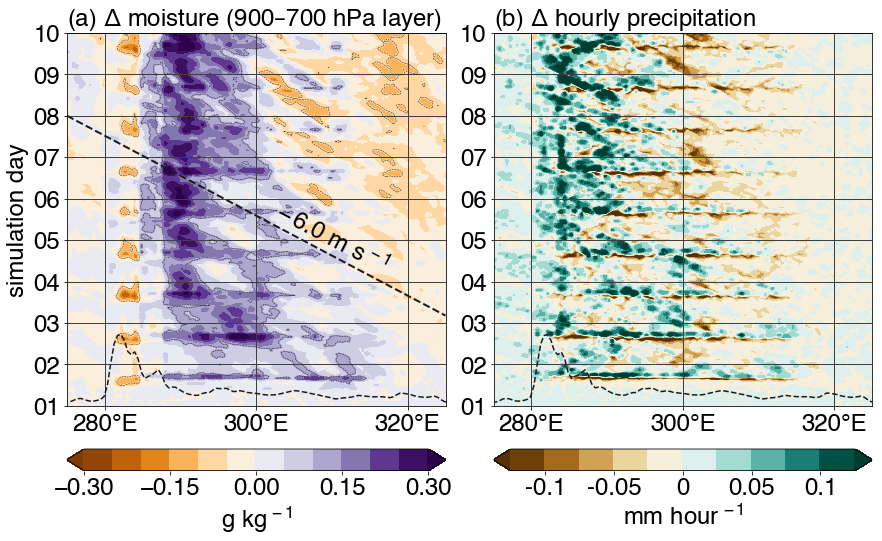

In [60]:
fontsize=24
fig = mp.figure(figsize=(12,6))

levels=numpy.arange(-0.3,0.310,0.05)
levels_precip = numpy.arange(-0.125,0.1251,0.025)

ax2=fig.add_subplot(121)
contour_moisture = ax2.contourf(xlong[0,:]+360.,time_datetimes-datetime.timedelta(hours=4),\
                           qvapor_diffs_lat_mean_850_700hPa*1000.,\
                           cmap='PuOr',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes-datetime.timedelta(hours=4),\
                           qvapor_diffs_lat_mean_850_700hPa*1000.,\
                           levels=[-0.1,0.1],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(a) $\Delta$ moisture (900–700 hPa layer)', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1,4,0,0),datetime.datetime(1979,1,10))
ax2.set_yticks(time_datetimes[[t.hour==0 and t.day<11 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(122)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes-datetime.timedelta(hours=4),\
                           raintot_hourly_diffs_lat_mean,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
ax3.text(s='(b) $\Delta$ hourly precipitation', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1,4,0,0),datetime.datetime(1979,1,10))
ax3.set_yticks(time_datetimes[[t.hour==0 and t.day<11 for t in time_datetimes]])
ax3.set_yticklabels([])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax2_pos.x0,ax2_pos.y0-0.15,ax2_pos.width,0.05])
cbar1 = mp.colorbar(contour_moisture, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-0.3,-0.15,0,0.15,0.3])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)
cbar1.add_lines(contour_line)

cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.15,ax3_pos.width,0.05])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-0.1,-0.05,0,0.05,0.1])
cbar2.set_ticklabels(['-0.1','-0.05','0','0.05','0.1'])
cbar2.set_label('mm hour$^{\,-1}$', fontsize=fontsize)

for c in contour_rain.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)
for c in contour_moisture.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)

for c in cbar1_ax.collections:
    c.set_edgecolor('face')
for c in cbar2_ax.collections:
    c.set_edgecolor('face')

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax2.get_xlim())

ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=1)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=1)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=1)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=1)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 6#-ua_400_mean #5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]

ax2.plot(xvals2,yvals2_datetime,lw=2,ls='--',c='0.1')

plot_ratio = ax2.get_data_ratio()
ax2.set_ylabel('simulation day', fontsize=fontsize)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax2.text(s='$-\,$'+'{:.1f}'.format(speed2)+' m s$^{\,-1}$',x=0.7,y=0.45,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+15)

fig.savefig('../figures/POSTER_hovmoller.pdf', dpi=300, bbox_inches='tight',transparent=True)
